In [1]:
import SpectralSynthesis as ss
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.ndimage.filters import gaussian_filter
from matplotlib.offsetbox import AnchoredText
from scipy.stats import lognorm, linregress

c:\Users\Matt\.conda\envs\astronomy\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
H_list = [1,0.5,0]
S_list = [0.1,0.5,2.0]
SEED = 42
N = 1000
E=2

c:\Github\thesis-images\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)
C:\Users\Matt\AppData\Local\Temp\ipykernel_32096\3156258714.py:21: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cont = ax[i,j].contour(gaussian_filter(X, sigma), levels = 2, cmap='magma', linewidth = 1)
c:\Github\thesis-images\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in reciprocal
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)


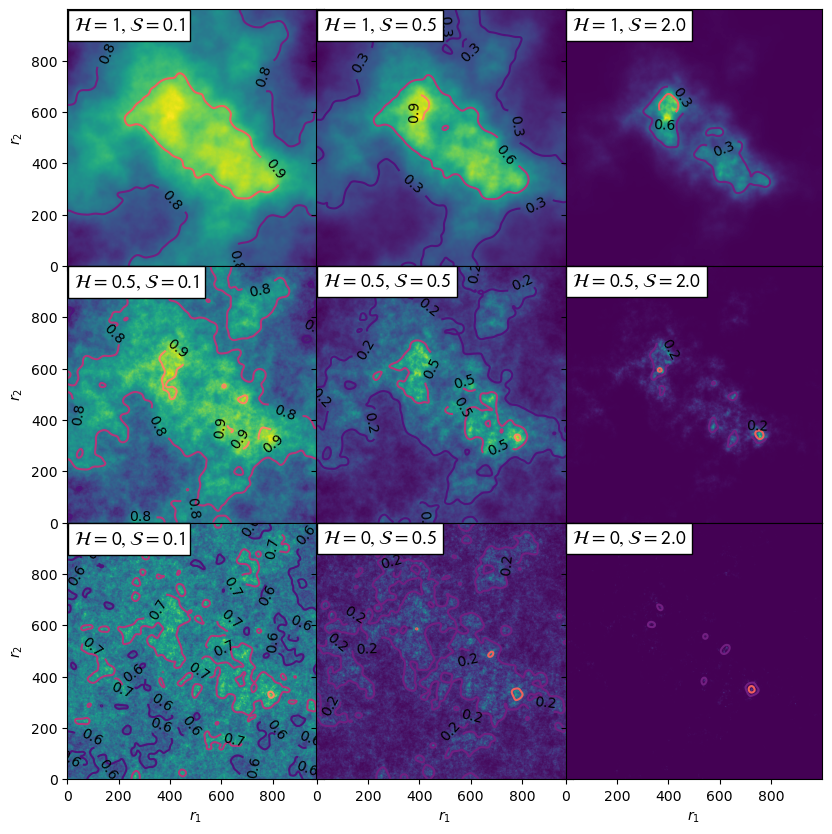

In [3]:
props = dict(facecolor='white', alpha=1)
sigma = 10

f,ax = plt.subplots(3,3, figsize = (10,10), sharex=True, sharey=True)

X_list = []
s_list = []
loc_list = []
scale_list = []
ps_list = []



for i, H in enumerate(H_list):
    for j, S in enumerate(S_list):
        X = ss.fBm(N=N, E=E, H=H, sigma=S, exp=True, centred = True, seed=SEED)
        X /= np.max(X.flatten())
        img = ax[i,j].imshow(X, origin='lower')
        ax[i,j].text(0.025, 0.977, fr'$\cal H={H}, \cal S={S}$', transform=ax[i,j].transAxes, fontsize=14,
            verticalalignment='top', bbox=props, zorder=100)
        cont = ax[i,j].contour(gaussian_filter(X, sigma), levels = 2, cmap='magma', linewidth = 1)

        ax[i,j].clabel(cont, fmt='%1.1f', colors = 'k', fontsize=10)

        s, loc, scale = lognorm.fit(X.flatten())     

        PS = np.fft.fftn(X)
        abs_ps = np.log10(np.abs(np.fft.fftshift(PS)))   
        
        ps_list.append(abs_ps)
        s_list.append(s)
        loc_list.append(loc)
        scale_list.append(scale)
        X_list.append(X)
        ax[i,j].set_xlabel(r'$r_1$')



    ax[i,0].set_ylabel(r'$r_2$')

f.subplots_adjust(wspace=-0.1, hspace=0)

plt.savefig('D:/Workshop/PhD/Thesis/Chapter 2/2DxfBm.png', bbox_inches = 'tight')
plt.show()

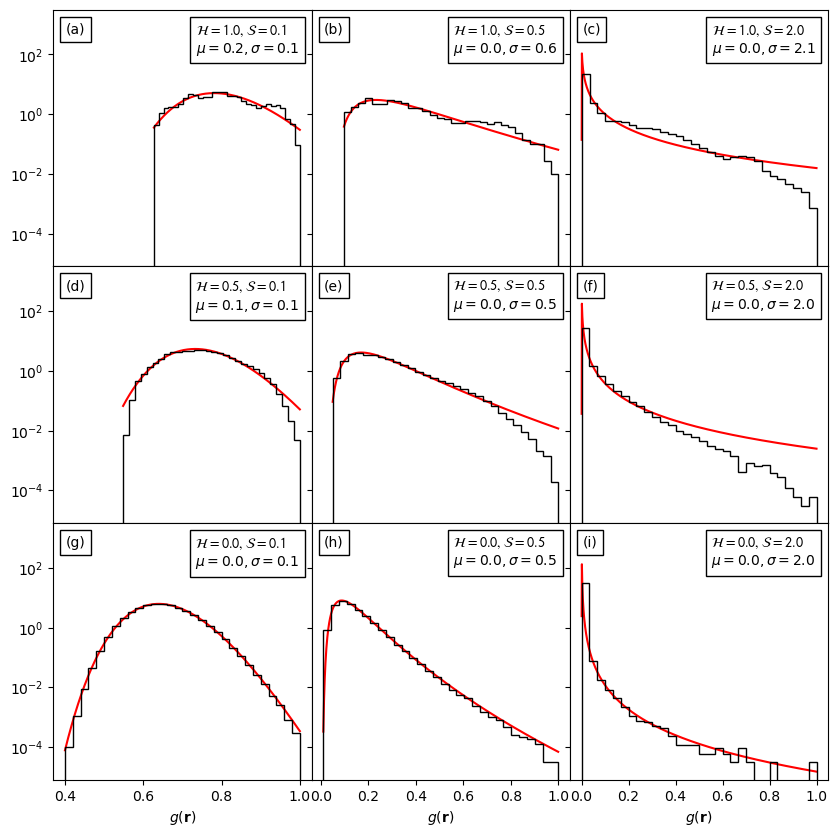

In [4]:
props = dict(facecolor='white', alpha=0.4)
sigma = 10

f,ax = plt.subplots(3,3, figsize = (10,10), sharex='col', sharey='row')

c=0

for i, H in enumerate(H_list):
    for j, S in enumerate(S_list):
        
        data = X_list[c].flatten()

        x = np.linspace(np.min(data), np.max(data), 1000)

        ax[i,j].plot(x, lognorm.pdf(x,s_list[c], loc_list[c], scale_list[c]), 'r-')

        ax[i,j].hist(data, bins=30, density=True, histtype='step', color='k')
        
        
        text = fr'$\cal H={H:.1f}, \cal S={S:.1f}$'+'\n'+fr'$\mu = {loc_list[c]:.1f},\sigma = {s_list[c]:.1f}$'

        anchored_text = AnchoredText(text, loc=1)
        ax[i,j].add_artist(anchored_text)

        label_text = AnchoredText(f'({chr(c+97)})', loc=2)
        ax[i,j].add_artist(label_text)

        ax[i,j].set_yscale('log')#, nonposy='clip')

        ax[i,j,].set_ylim(10**-(5.1), 10**3.5)
        ax[2,j].set_xlabel(r'$g(\mathbf{r})$')
        c +=1

f.subplots_adjust(wspace=0, hspace=0)

plt.savefig('D:/Workshop/PhD/Thesis/Chapter 2/2DxfBm-dist.png', bbox_inches = 'tight')
plt.show()

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


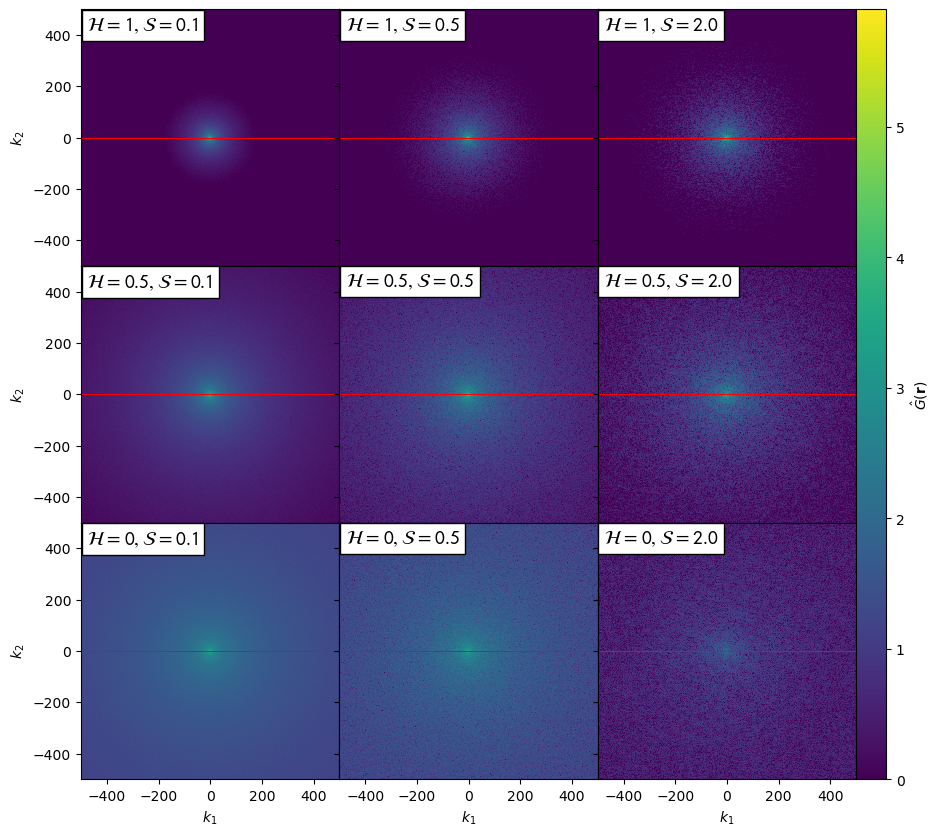

In [5]:
props = dict(facecolor='white', alpha=1)
sigma = 10

f,ax = plt.subplots(3,3, figsize = (10,10), sharex=True, sharey=True)

max = np.max([np.max(ps.flatten()) for ps in ps_list])

ps_slice_list = []

c=0

for i, H in enumerate(H_list):
    for j, S in enumerate(S_list):
        print(i,j)
        img = ax[i,j].pcolor(np.arange(-500,500),np.arange(-500,500), ps_list[c], vmin=0, vmax = max)

        ax[i,j].text(0.025, 0.977, fr'$\cal H={H}, \cal S={S}$', transform=ax[i,j].transAxes, fontsize=14,
            verticalalignment='top', bbox=props, zorder=100)
 
        ax[i,j].set_xlabel(r'$k_1$')
        ax[i,j].axhline(0, c='r', linewidth=0.7)

        ps_slice_list.append(ps_list[c][500,:])

        c+=1

    ax[i,0].set_ylabel(r'$k_2$')

cbaxes = f.add_axes([0.9, 0.11, 0.03, 0.77])
cb = plt.colorbar(img,orientation="vertical", cax = cbaxes)
cb.set_label(r'$\hat{G}(\mathbf{r})$')

f.subplots_adjust(wspace=0, hspace=0)

plt.savefig('D:/Workshop/PhD/Thesis/Chapter 2/2DxfBm-PS.png', bbox_inches = 'tight')
plt.show()

C:\Users\Matt\AppData\Local\Temp\ipykernel_32096\3017103677.py:14: RuntimeWarning: divide by zero encountered in log10
  df['log10(k)'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_32096\3017103677.py:14: RuntimeWarning: invalid value encountered in log10
  df['log10(k)'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_32096\3017103677.py:14: RuntimeWarning: divide by zero encountered in log10
  df['log10(k)'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_32096\3017103677.py:14: RuntimeWarning: invalid value encountered in log10
  df['log10(k)'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_32096\3017103677.py:14: RuntimeWarning: divide by zero encountered in log10
  df['log10(k)'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_32096\3017103677.py:14: RuntimeWarning: invalid value encountered in log10
  df['log10(k)'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_32096\3017103677.py:14: RuntimeWarning: divide by zero encou

H_TRUE = 1, H_EST = 1.0008667550655965, S_TRUE = 0.1, S_EST = 0.10000000000000002, H_error = -0.000866755065596525, S_error = -1.3877787807814457e-16
H_TRUE = 1, H_EST = 0.9967280830589145, S_TRUE = 0.5, S_EST = 0.49999999999999994, H_error = 0.0032719169410855287, S_error = 1.1102230246251565e-16
H_TRUE = 1, H_EST = 1.0431718491183166, S_TRUE = 2.0, S_EST = 2.0, H_error = -0.04317184911831662, S_error = 0.0
H_TRUE = 0.5, H_EST = 0.5029256265571811, S_TRUE = 0.1, S_EST = 0.1, H_error = -0.005851253114362187, S_error = 0.0
H_TRUE = 0.5, H_EST = 0.515305061542151, S_TRUE = 0.5, S_EST = 0.5000000000000001, H_error = -0.03061012308430211, S_error = -2.220446049250313e-16


C:\Users\Matt\AppData\Local\Temp\ipykernel_32096\3017103677.py:14: RuntimeWarning: divide by zero encountered in log10
  df['log10(k)'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_32096\3017103677.py:14: RuntimeWarning: invalid value encountered in log10
  df['log10(k)'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_32096\3017103677.py:14: RuntimeWarning: divide by zero encountered in log10
  df['log10(k)'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_32096\3017103677.py:14: RuntimeWarning: invalid value encountered in log10
  df['log10(k)'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_32096\3017103677.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  H_error = (H-H_est)/H
C:\Users\Matt\AppData\Local\Temp\ipykernel_32096\3017103677.py:14: RuntimeWarning: divide by zero encountered in log10
  df['log10(k)'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_32096\3017103677.py:14: RuntimeWarning: invalid value enc

H_TRUE = 0.5, H_EST = 0.5243033296604152, S_TRUE = 2.0, S_EST = 2.0, H_error = -0.0486066593208303, S_error = 0.0
H_TRUE = 0, H_EST = 0.003936546666031937, S_TRUE = 0.1, S_EST = 0.10000000000000005, H_error = -inf, S_error = -4.163336342344337e-16
H_TRUE = 0, H_EST = 0.024924808900610662, S_TRUE = 0.5, S_EST = 0.5000000000000001, H_error = -inf, S_error = -2.220446049250313e-16
H_TRUE = 0, H_EST = -0.16853331342112743, S_TRUE = 2.0, S_EST = 2.0, H_error = inf, S_error = 0.0


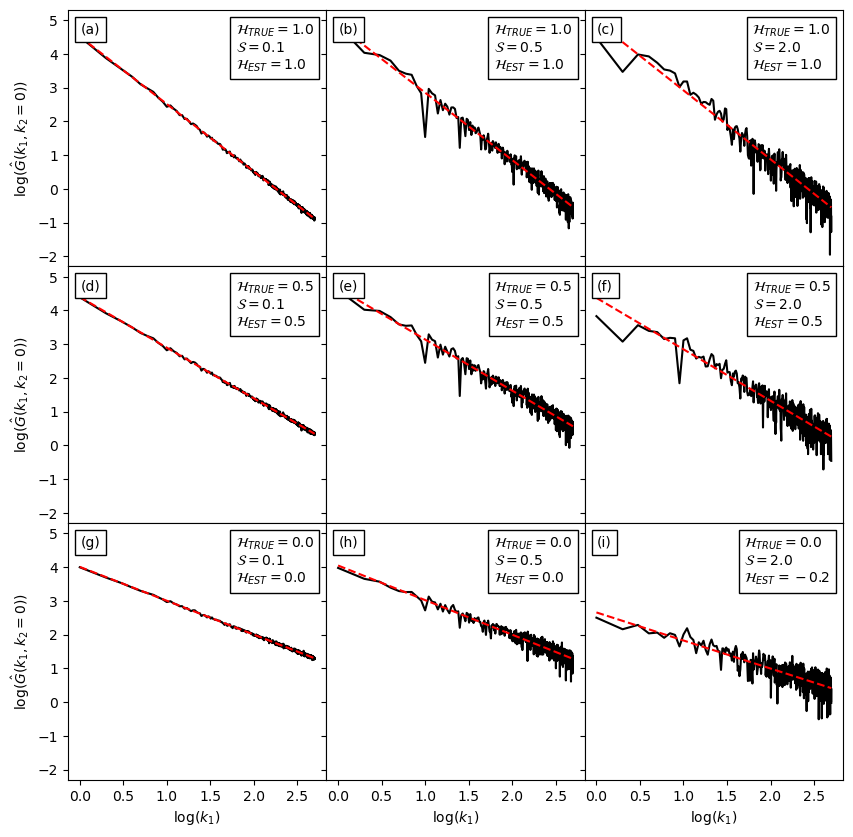

In [7]:
props = dict(facecolor='white', alpha=1)

f,ax = plt.subplots(3,3, figsize = (10,10), sharex=True, sharey=True)

k = np.arange(-N/2, N/2)

c=0

for i, H in enumerate(H_list):
    for j, S in enumerate(S_list):

        df = pd.DataFrame()

        df['log10(k)'] = np.log10(k)
        df['G'] = ps_slice_list[c] 

        ax[i,j].plot(df['log10(k)'], df['G'], c='k')

        df=df.replace([np.inf, -np.inf], np.nan).dropna()

        slope, intercept, r_value, p_value, std_err = linregress(df['log10(k)'], df['G'])

        beta = -2*slope
        H_est = (beta-2)/2
        S_est = np.std(np.log(X_list[c]))

        H_error = (H-H_est)/H
        S_error = (S-S_est)/S

        ax[i,j].plot(df['log10(k)'], df['log10(k)']*slope + intercept, c='r', ls='--')

        text = fr'$\mathcal{{H}}_{{TRUE}}={H:.1f}$'+'\n'+fr'$\mathcal{{S}}={S:.1f}$'+'\n'+fr'$\mathcal{{H}}_{{EST}} = {(beta-2)/2:.1f}$'

        anchored_text = AnchoredText(text, loc=1)
        ax[i,j].add_artist(anchored_text)

        label_text = AnchoredText(f'({chr(c+97)})', loc=2)
        ax[i,j].add_artist(label_text)

 
        ax[i,j].set_xlabel(r'$\log(k_1)$')

        print(f'H_TRUE = {H}, H_EST = {(beta-2)/2}, S_TRUE = {S}, S_EST = {S_est}, H_error = {H_error}, S_error = {S_error}')

        c+=1

    ax[i,0].set_ylabel(r'$\log(\hat{G}(k_1,k_2=0))$')



f.subplots_adjust(wspace=0, hspace=0)

plt.savefig('D:/Workshop/PhD/Thesis/Chapter 2/2DxfBm-PS-sliced.png', bbox_inches = 'tight')
plt.show()